In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join


# Read all results from txt files

aco_path = "./ACO/"
aco_files = [f for f in listdir(aco_path) if isfile(join(aco_path, f))]

ga_path = "./GA/v2/"
ga_files = [f for f in listdir(ga_path) if isfile(join(ga_path, f))]

pso_path = "./PSO/v2/"
pso_files = [f for f in listdir(pso_path) if isfile(join(pso_path, f))]

pls_path = "./PLS/v2/"
pls_files = [f for f in listdir(pls_path) if isfile(join(pls_path, f))]

prs_path = "./PRS/v2/"
prs_files = [f for f in listdir(prs_path) if isfile(join(prs_path, f))]





# Ant Colony Optimization - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-iteration", "Iterations", "E-factor"]
df_aco = pd.DataFrame(columns = column_names)

for file in aco_files:
    f_path = join(aco_path,file)
    # res = pd.read_csv(f_path, sep = ': ', header=None, engine='python', nrows=10)
    res = pd.read_csv(f_path, names=["A","B"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    evp = float(res['B'][5]) # evaporation factor

    sup = float(res['B'][6]) # minimum support
    pat = float(res['B'][8]) # patterns
    mit = int(res['B'][9]) # maximum iteraction count
    
    # Fetch best-cost iteration values
    its = [0] * mit
    it_st = res.loc[res['B'] == ' Best Cost'].index[0] + 1 # iterations
    for i in range(mit):
        it = i + it_st
        its[i] = float(res['B'][it]) # cost
    
    if att == 11:
        col = "HCV"
    elif att == 98:
        col = "C2K"
    else:
        col = ""
                    
    df_aco = df_aco.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-iteration":mit, "Iterations":its, "E-factor": evp}, ignore_index=True)

    
    

# -------------------------------------------------------------------------------------
# Genetic Algorithm - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-evaluation", "Evaluations", "Max-iteration", "Iterations",  "N-pop", "PC"]
df_ga = pd.DataFrame(columns = column_names)

for file in ga_files:
    f_path = join(ga_path,file)
    res = pd.read_csv(f_path, names=["A","B"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    pop = float(res['B'][5]) # population size
    pc = float(res['B'][6]) # population size


    sup = float(res['B'][7]) # minimum support
    pat = float(res['B'][9]) # patterns
    mit = int(res['B'][10]) # maximum iteraction count
    mal = int(res['B'][11]) # maximum evaluation count
       
        
    # Fetch best-cost iteration values
    its = [0] * mit
    it_st = res.loc[res['B'] == ' Cost'].index[0] + 1 # iterations
    for i in range(mit):
        it = i + it_st
        its[i] = float(res['B'][it]) # cost
    
    if att == 11:
        col = "HCV"
    elif att == 98:
        col = "C2K"
    else:
        col = ""
        
    df_ga = df_ga.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-evaluation":mal, "Evaluations":its, "Max-iteration":mit, "Iterations":its, "N-pop": pop, "PC": pc}, ignore_index=True)

    
    
    
    


# -------------------------------------------------------------------------------------
# Particle Swarm Optimization - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-evaluation", "Evaluations", "Max-iteration", "Iterations", "N-particle", "Velocity", "C1", "C2"]
df_pso = pd.DataFrame(columns = column_names)

for file in pso_files:
    f_path = join(pso_path,file)
    res = pd.read_csv(f_path, names=["A","B"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    vel = float(res['B'][5]) # velocity
    c1 = float(res['B'][6]) # personal coefficient
    c2 = float(res['B'][7]) # global coefficient
    npat = float(res['B'][8]) # particle count

    sup = float(res['B'][9]) # minimum support
    pat = float(res['B'][11]) # patterns
    mit = int(res['B'][12]) # maximum iteraction count
    mal = int(res['B'][13]) # maximum evaluation count

    
    # Fetch best-cost iteration values
    its = [0] * mit
    it_st = res.loc[res['B'] == ' Cost'].index[0] + 1 # iterations
    for i in range(mit):
        it = i + it_st
        its[i] = float(res['B'][it]) # cost
    
    if att == 11:
        col = "HCV"
    elif att == 98:
        col = "C2K"
    else:
        col = ""
        
    df_pso = df_pso.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-evaluation":mal, "Evaluations":its, "Max-iteration":mit, "Iterations":its, "N-particle": npat, "Velocity": vel, "C1": c1, "C2": c2}, ignore_index=True)

    

    
    
# -------------------------------------------------------------------------------------
# Pure Local Search - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-evaluation", "Evaluations", "Max-iteration", "Iterations", "Step-size"]
df_pls = pd.DataFrame(columns = column_names)

for file in pls_files:
    f_path = join(pls_path,file)
    # res = pd.read_csv(f_path, sep = ': ', header=None, engine='python', nrows=10)
    res = pd.read_csv(f_path, names=["A","B"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    stp = float(res['B'][5]) # step size

    sup = float(res['B'][6]) # minimum support
    pat = float(res['B'][8]) # patterns
    mit = int(res['B'][9]) # maximum iteraction count
    mal = int(res['B'][10]) # maximum evaluation count

    
    # Fetch best-cost iteration values
    its = [0] * mit
    it_st = res.loc[res['B'] == ' Cost'].index[0] + 1 # iterations
    for i in range(mit):
        it = i + it_st
        its[i] = float(res['B'][it]) # cost
    
    if att == 11:
        col = "HCV"
    elif att == 98:
        col = "C2K"
    else:
        col = ""
                    
    df_pls = df_pls.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-evaluation":mal, "Evaluations":its, "Max-iteration":mit, "Iterations":its, "Step-size": stp}, ignore_index=True)

    
    
    

# -------------------------------------------------------------------------------------
# Pure Local Search - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-evaluation", "Evaluations", "Max-iteration", "Iterations"]
df_prs = pd.DataFrame(columns = column_names)

for file in prs_files:
    f_path = join(prs_path,file)
    # res = pd.read_csv(f_path, sep = ': ', header=None, engine='python', nrows=10)
    res = pd.read_csv(f_path, names=["A","B"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    sup = float(res['B'][5]) # minimum support
    pat = float(res['B'][7]) # patterns
    mit = int(res['B'][8]) # maximum iteraction count
    mal = int(res['B'][9]) # maximum evaluation count

    
    # Fetch best-cost iteration values
    its = [0] * mit
    it_st = res.loc[res['B'] == ' Cost'].index[0] + 1 # iterations
    for i in range(mit):
        it = i + it_st
        its[i] = float(res['B'][it]) # cost
    
    if att == 11:
        col = "HCV"
    elif att == 98:
        col = "C2K"
    else:
        col = ""
                    
    df_prs = df_prs.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-evaluation":mal, "Evaluations":its, "Max-iteration":mit, "Iterations":its}, ignore_index=True)

    

In [2]:
import numpy as np


# Combining the results
frames = [df_ga, df_pso, df_pls, df_prs]
df_res = pd.concat(frames, ignore_index=True)
# Only include these columns
df_res = df_res[['Data-set', 'Algorithm', 'Pattern-count', 'Max-evaluation', 'Evaluations', 'Max-iteration', 'Iterations']]


data_sets = ['HCV', 'C2K']
algorithms = ['GA-GRAANK', 'PSO-GRAANK', 'PLS-GRAANK', 'PRS-GRAANK']
evals = [1000]  # [10, 100, 1000]
eval_data = []

for ds in data_sets:
    df1 = df_res.loc[df_res['Data-set'] == ds]
    
    for alg in algorithms:
        df2 = df1.loc[df1['Algorithm'].str.contains(alg)]
                
        for ev in evals:
            df3 = df2.loc[df2['Max-iteration'] == ev]
            # print(df3)

            # 100 rows
            eval_arr = []
            for index,row in df3.iterrows():
                # 10/100/1000 evaluations
                eval_arr.append(row['Iterations'])
            eval_arr = np.array(eval_arr)
            eval_min = np.min(eval_arr, axis=0)
            eval_avg = np.mean(eval_arr, axis=0)
            eval_max = np.max(eval_arr, axis=0)
            eval_std = np.std(eval_arr, axis=0)
            eval_avg_mn = eval_avg - eval_std
            eval_avg_pl = eval_avg + eval_std

            eval_data.append([ds, alg, df3['Pattern-count'].mean(), df3['Pattern-count'].std(), ev, eval_min, eval_avg_mn, eval_avg, eval_avg_pl, eval_max])

df_data = pd.DataFrame(data=eval_data, columns=['Data-set', 'Algorithm', 'Patterns (mean)', 'Patterns (std)', 'Iterations','Iterations (min)', 'Iterations (mu-sigma)', 'Iterations (mu)', 'Iterations (mu+sigma)', 'Iterations (max)'])
df_data
#print(eval_arr)
#print(eval_avg)
#print(eval_std)
#print(eval_avg_mn)





,Data-set,Algorithm,Patterns (mean),Patterns (std),Iterations,Iterations (min),Iterations (mu-sigma),Iterations (mu),Iterations (mu+sigma),Iterations (max)
0,HCV,GA-GRAANK,3.330000,1.025483,1000,"[2.141923876025446e-05, 1.956296339769548e-05,...","[3.225318705447257e-05, 6.707857679076108e-05,...","[0.00022973508441136167, 0.0001666184572457843...","[0.0004272169817682508, 0.00026615833770080754...","[0.0014104372355430183, 0.00034940600978336826..."
1,HCV,PSO-GRAANK,2.070000,0.879107,1000,"[3.382377811601556e-05, 3.382377811601556e-05,...","[6.291247556423969e-05, 4.790395859601991e-05,...","[0.00027383951706898323, 0.0001735091895687653...","[0.00048476655857372674, 0.0002991144205415108...","[0.0012738853503184713, 0.000731528895391368, ..."
2,HCV,PLS-GRAANK,2.610000,1.013993,1000,"[2.860493721216282e-05, 2.860493721216282e-05,...","[-0.0003615469171169669, -3.27326020594914e-05...","[0.0010252191755598832, 0.0006117920566403605,...","[0.0024119852682367333, 0.0012563167153402124,...","[0.01, 0.003968253968253968, 0.003968253968253..."
3,HCV,PRS-GRAANK,3.630000,1.106957,1000,"[5.028916268544129e-05, 4.239623521431297e-05,...","[-6.526645783087534e-05, -1.5858186756143532e-...","[0.0007315976012058659, 0.00048600062411078985...","[0.0015284616602426072, 0.0009878594349777233,...","[0.004629629629629629, 0.003703703703703704, 0..."
4,C2K,GA-GRAANK,3.280000,0.932900,1000,"[0.011764705882352941, 0.011764705882352941, 0...","[0.628579388536374, 0.4812957823311083, 0.3847...","[0.8964184652882132, 0.815670361053267, 0.7529...","[1.1642575420400525, 1.1500449397754255, 1.121...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
5,C2K,PSO-GRAANK,1.539216,0.557071,1000,"[1.0, 0.005917159763313609, 0.0059171597633136...","[1.0, 0.44349804798277126, 0.27007754071752743...","[1.0, 0.796730248993292, 0.6757438680172568, 0...","[1.0, 1.1499624500038128, 1.0814101953169861, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
6,C2K,PLS-GRAANK,2.303922,0.805786,1000,"[0.01818181818181818, 0.007633587786259542, 0....","[0.5991303015700196, 0.5177444542836644, 0.435...","[0.8799749365224367, 0.8389958540497531, 0.793...","[1.160819571474854, 1.1602472538158417, 1.1511...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
7,C2K,PRS-GRAANK,2.970588,0.906040,1000,"[0.00847457627118644, 0.00847457627118644, 0.0...","[0.5263053658553062, 0.4612353349498427, 0.383...","[0.8471133355756273, 0.8061745358132981, 0.756...","[1.1679213052959483, 1.1511137366767534, 1.130...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


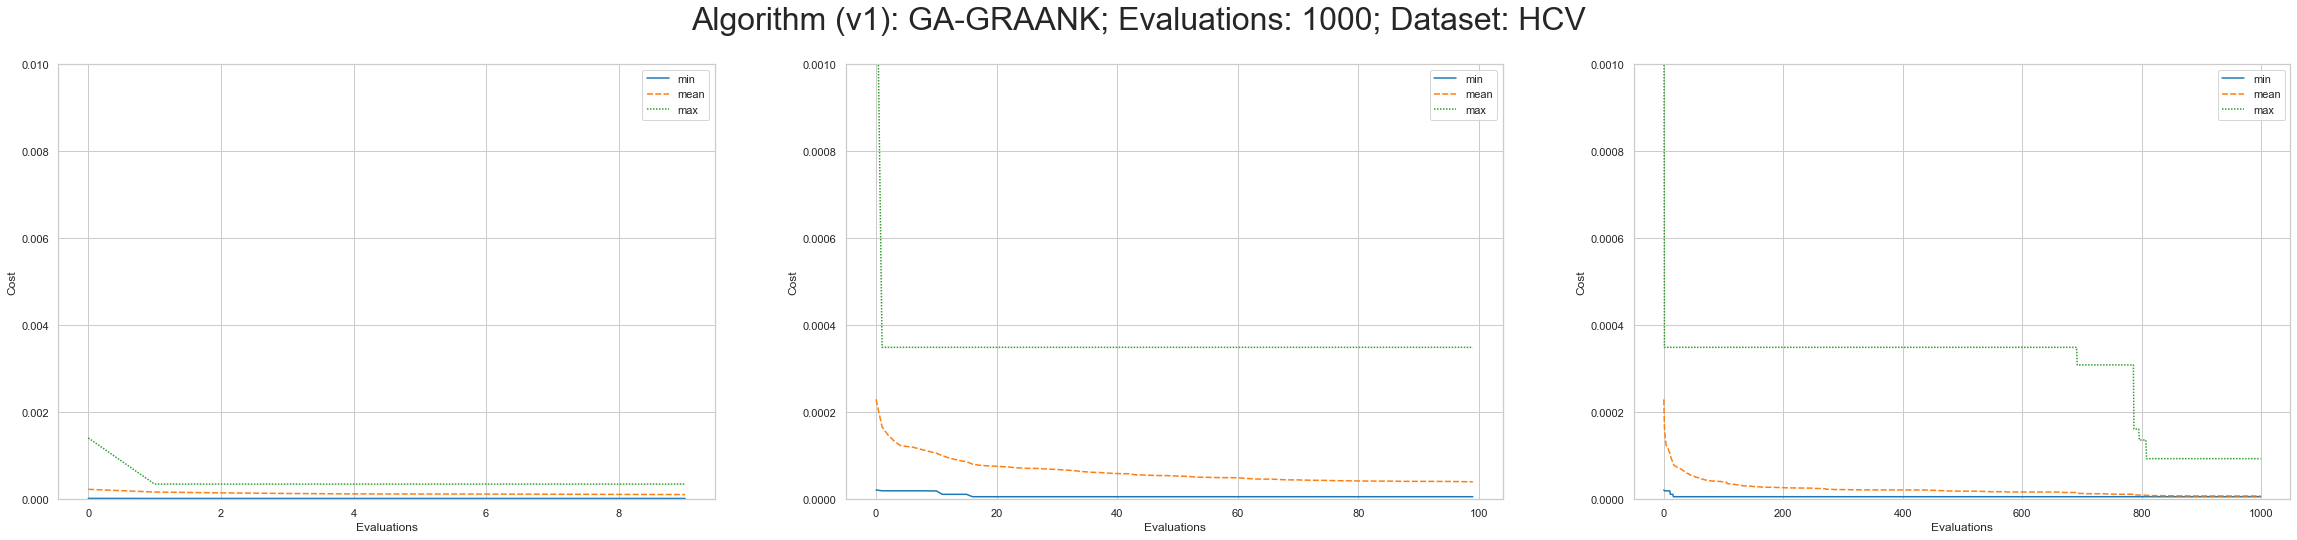

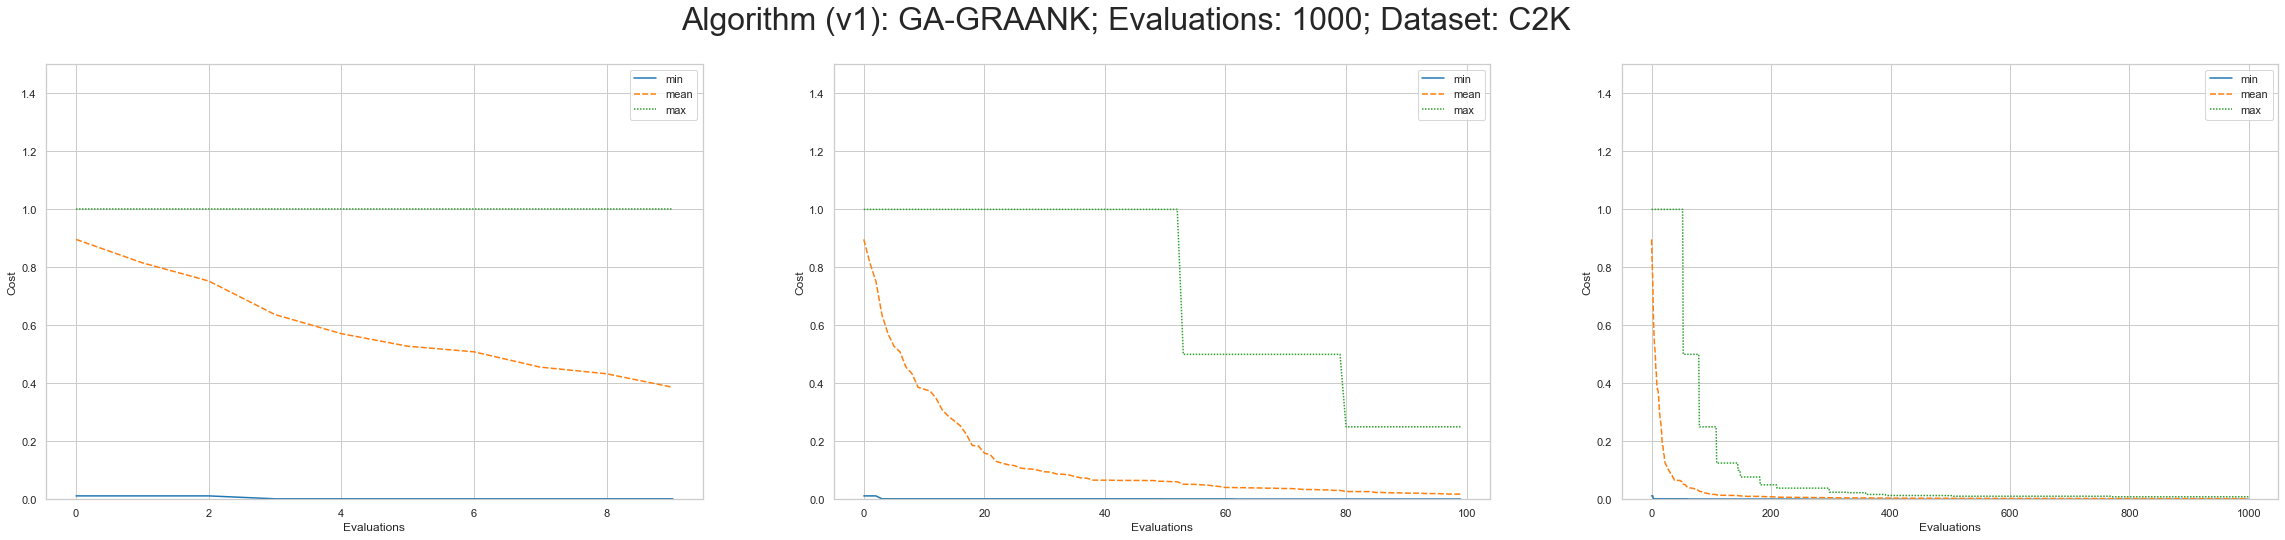

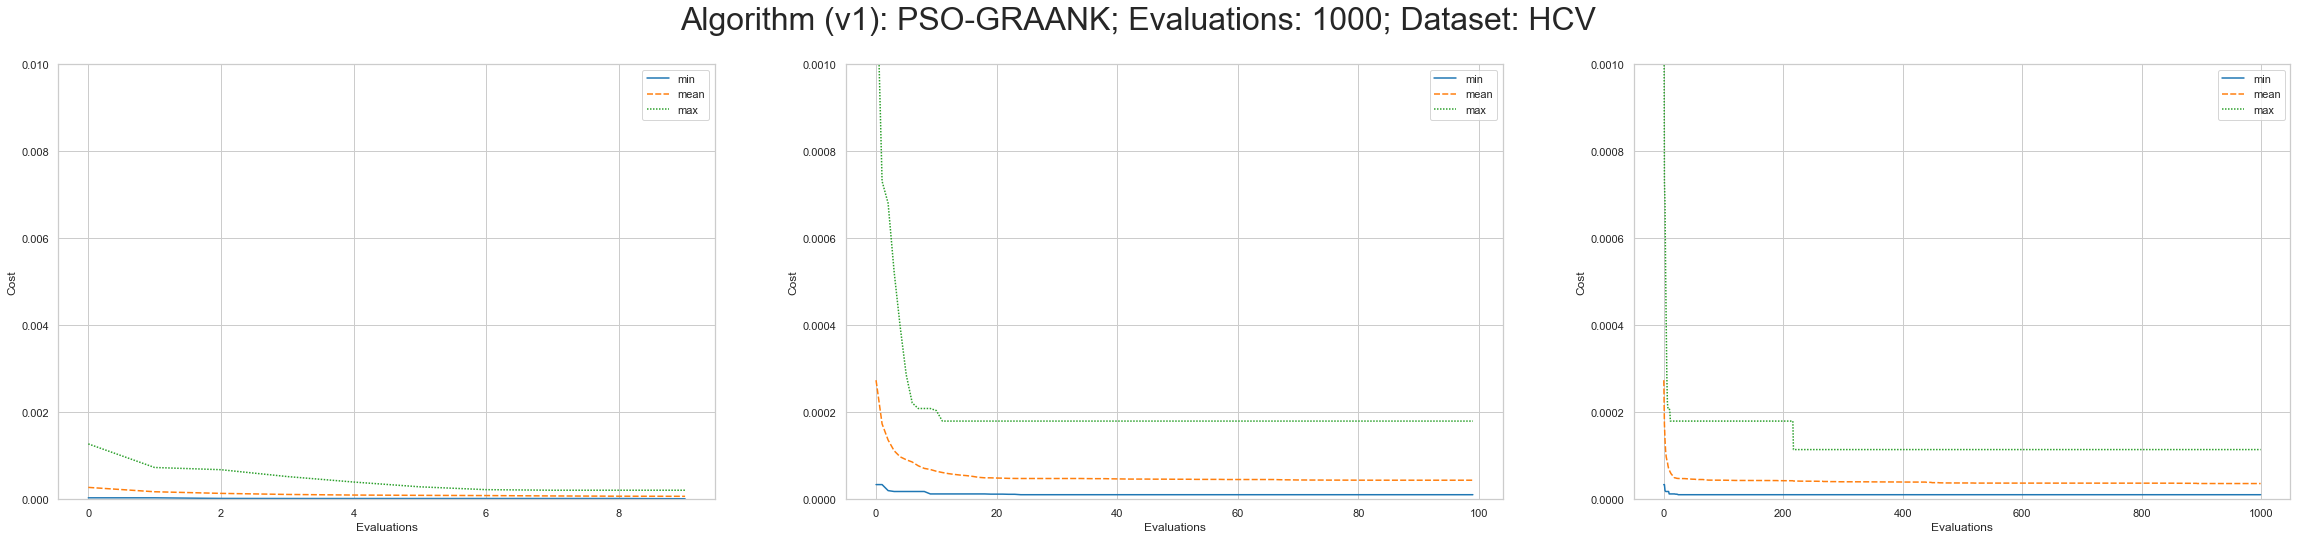

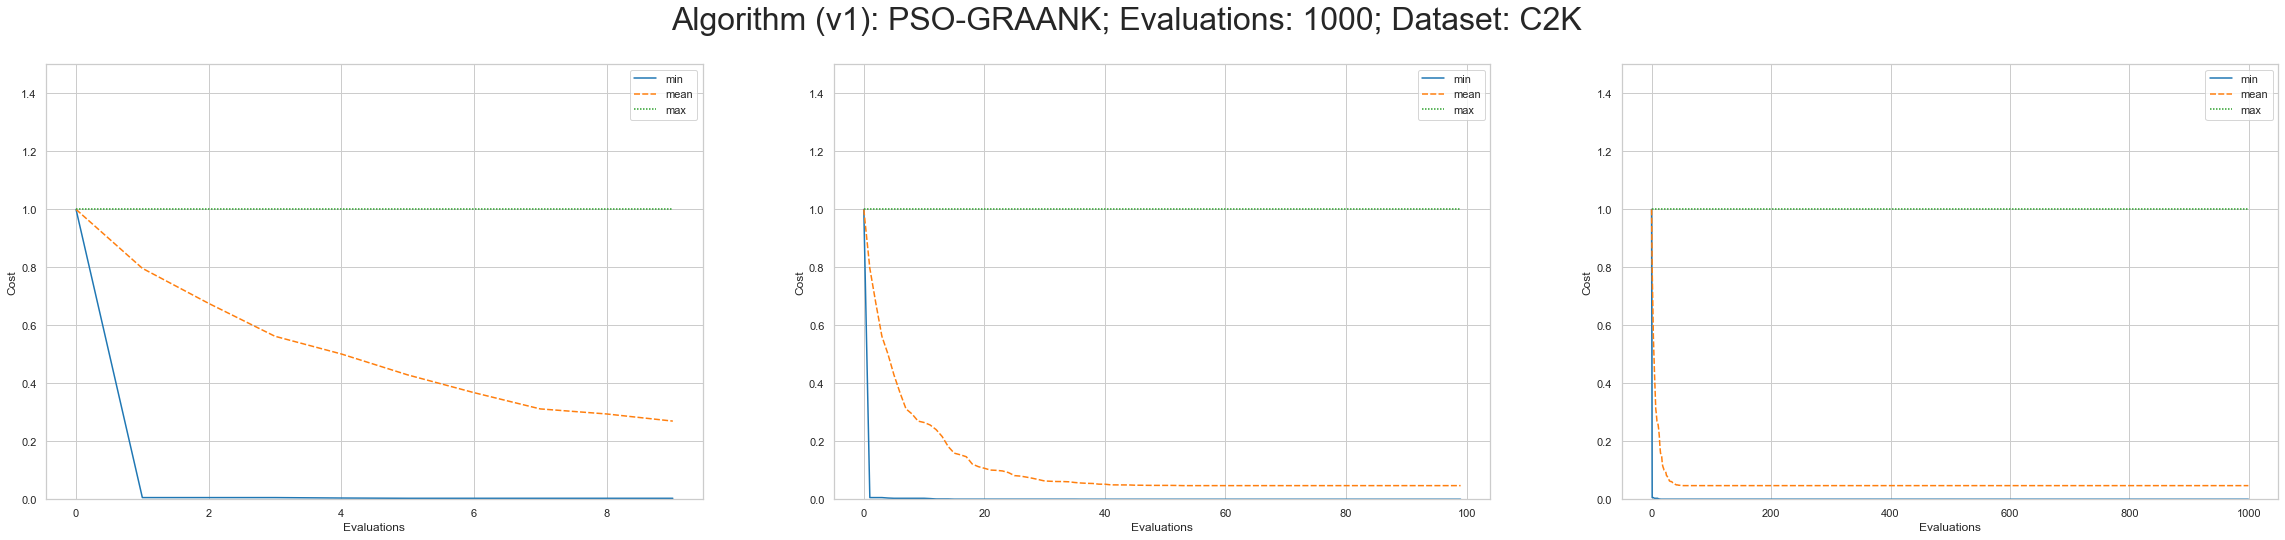

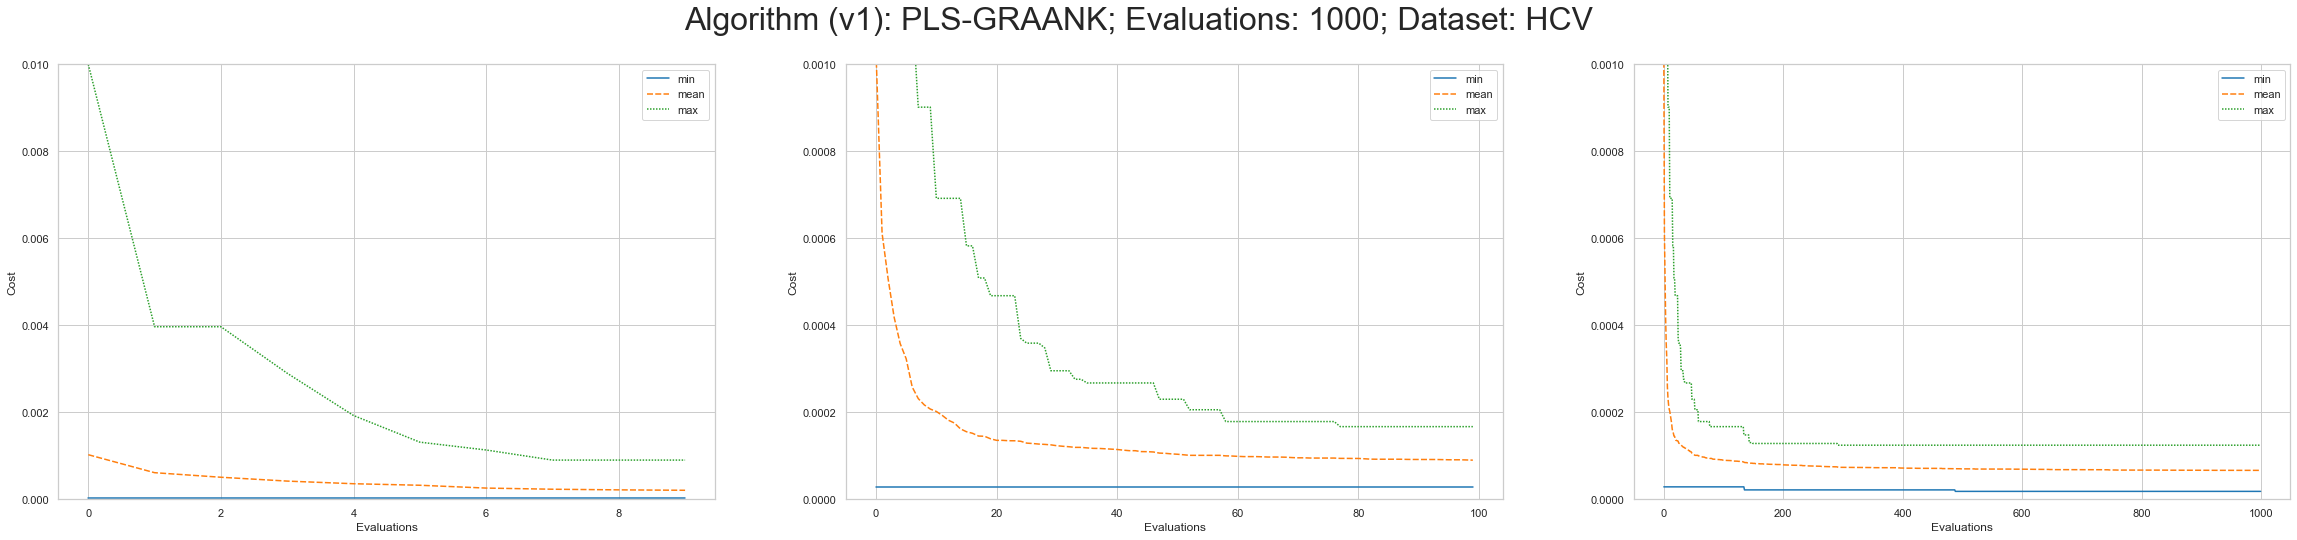

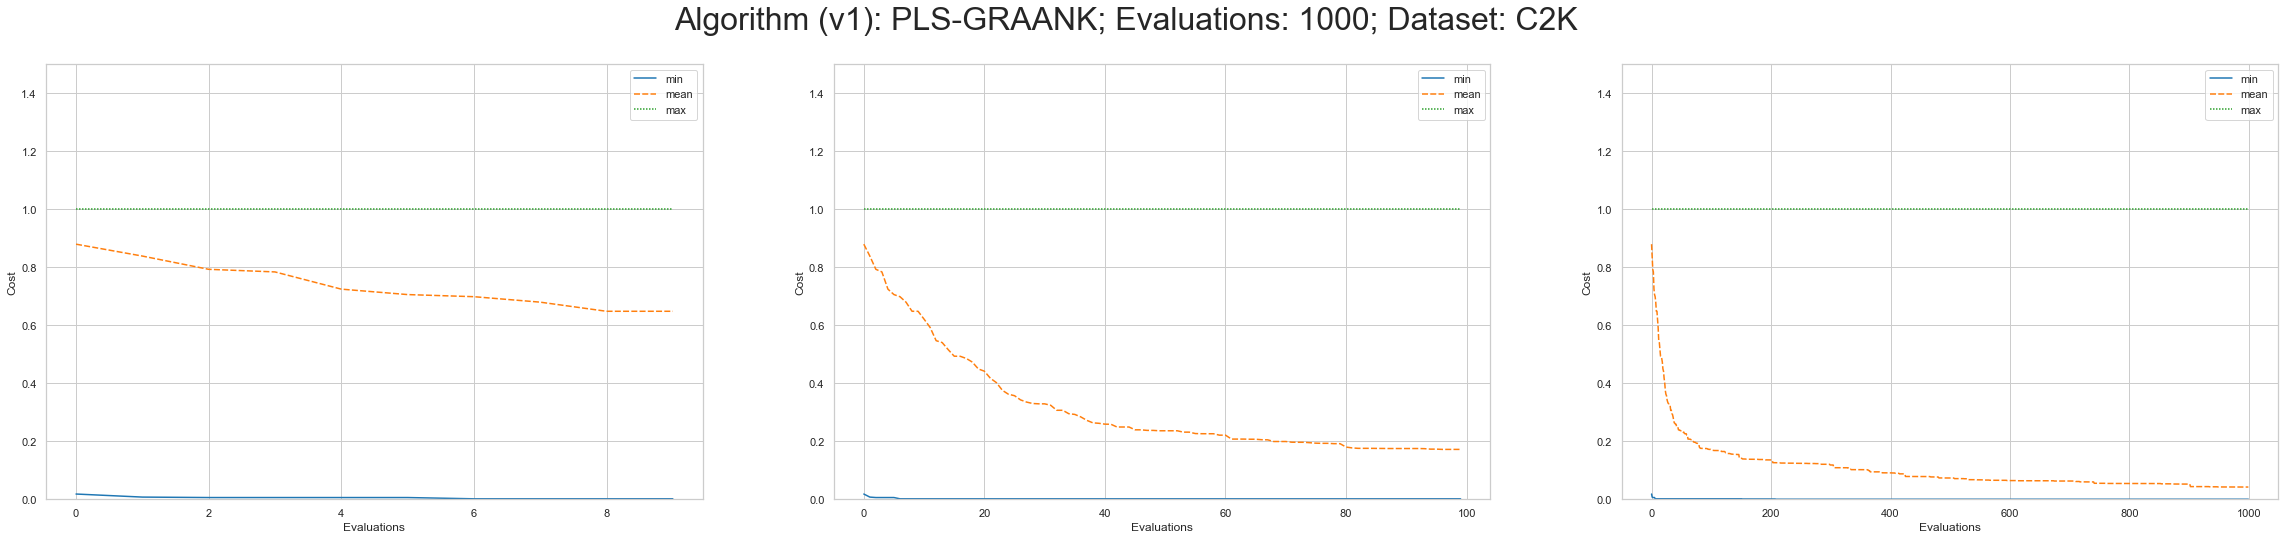

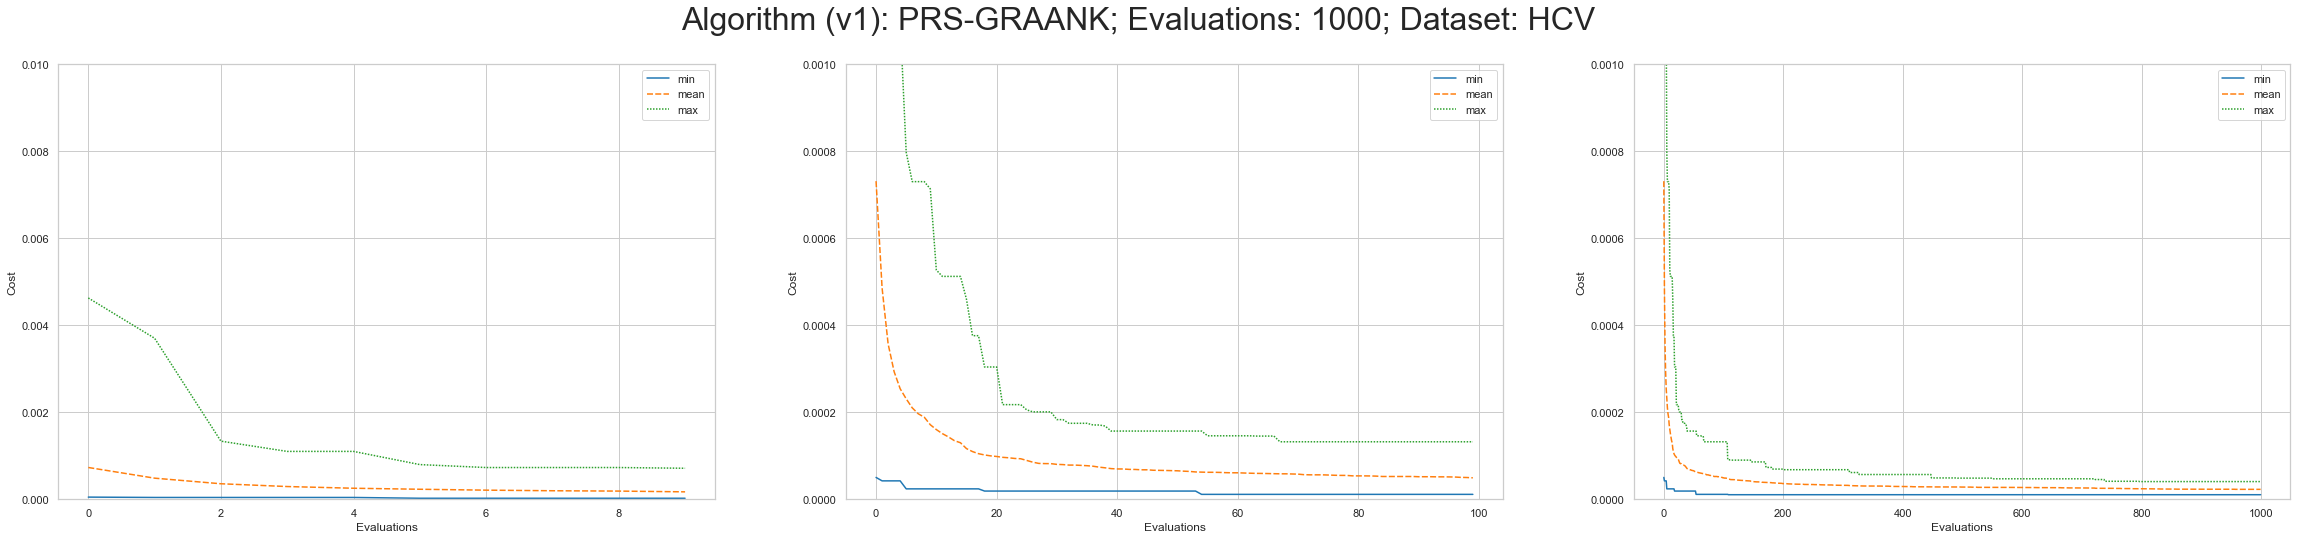

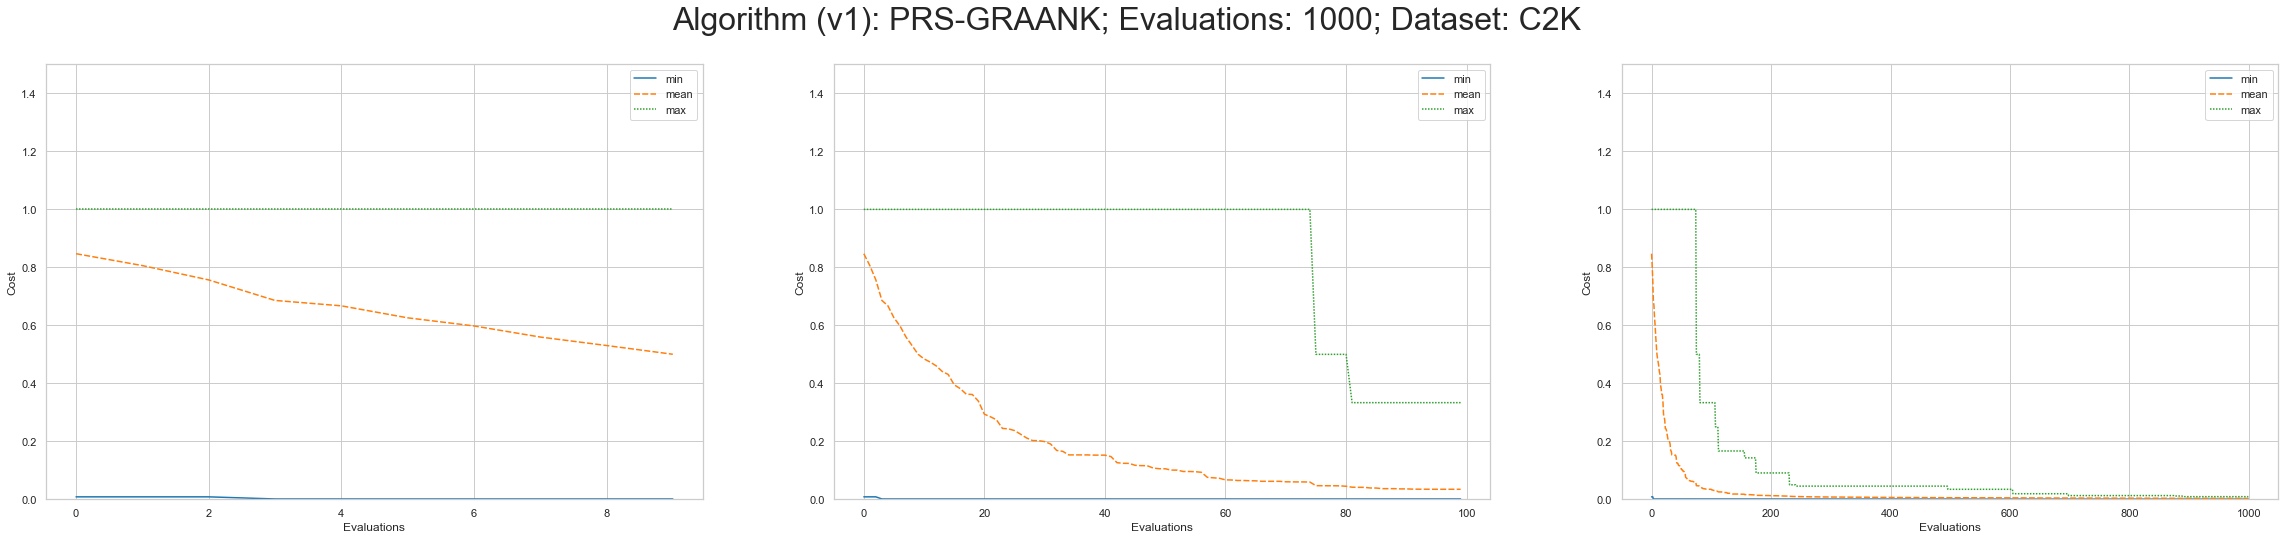

In [3]:
# Plotting the results 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

for alg in algorithms:
    df_alg = df_data.loc[df_data['Algorithm'].str.contains(alg)]
    
    for ds in data_sets:
        df1 = df_alg.loc[df_alg['Data-set'] == ds]

        for ev in evals:
            df2 = df1.loc[df1['Iterations'] == ev]

            fig = plt.figure(figsize=(40,8))
            for index,row in df2.iterrows():
                # Results
                values = np.array([row['Iterations (min)'], row['Iterations (mu)'], row['Iterations (max)']]).T
                # x = 100
                if ds == 'C2K':
                    lims = [1.5, 1.5, 1.5] 
                else:
                    lims = [0.01, 0.001, 0.001]
                i = 1
                for x in ([10, 100, 1000]):
                    plt.subplot(1, 3, i)
                    limits = np.arange(x)
                    vals = values[0:x]
                    # limits = np.arange(row['Evaluations'])
                    data = pd.DataFrame(vals, limits, columns=["min", "mean", "max"])

                    sns.lineplot(data=data, palette="tab10")
                    plt.ylim(0, lims[i-1])
                    plt.xlabel('Evaluations')
                    plt.ylabel('Cost')
                    i += 1
                
            fig.suptitle('Algorithm (v1): ' + str(alg) + '; Evaluations: ' + str(row['Iterations']) + '; Dataset: ' + ds, fontsize=32)
    # print(data)